In [1]:
import pandas as pd
from rdkit.Chem import Draw, AllChem

In [2]:
df = pd.read_csv('cleaned_uspto50k.csv')
df

,rxn_smiles,reactants,products,retro_template
0,O=C(OCc1ccccc1)[NH:1][CH2:2][CH2:3][CH2:4][CH2...,O=C(OCc1ccccc1)[NH:1][CH2:2][CH2:3][CH2:4][CH2...,[NH2:1][CH2:2][CH2:3][CH2:4][CH2:5][C@@H:6]([C...,([C:2]-[NH2;D1;+0:1])>>(O=C(-O-C-c1:c:c:c:c:c:...
1,O[C:1](=[O:2])[c:3]1[cH:4][c:5]([N+:6](=[O:7])...,O[C:1](=[O:2])[c:3]1[cH:4][c:5]([N+:6](=[O:7])...,[C:1](=[O:2])([c:3]1[cH:4][c:5]([N+:6](=[O:7])...,([#16;a:4]:[c:3]-[C;H0;D3;+0:1](=[O;D1;H0:2])-...
2,O=[CH:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[n:7][c...,O=[CH:1][c:2]1[cH:3][cH:4][c:5](-[c:6]2[n:7][c...,[CH2:1]([c:2]1[cH:3][cH:4][c:5](-[c:6]2[n:7][c...,([C:3]-[N;H0;D3;+0:4](-[C:5])-[CH2;D2;+0:1]-[c...
3,O=[C:1]([CH2:2][F:3])[CH2:4][F:5].[CH3:6][C:7]...,O=[C:1]([CH2:2][F:3])[CH2:4][F:5].[CH3:6][C:7]...,[CH:1]([CH2:2][F:3])([CH2:4][F:5])[N:35]1[CH2:...,([C:2]-[CH;D3;+0:1](-[C:3])-[N;H0;D3;+0:5](-[C...
4,Cl[C:1](=[O:2])[O:3][CH:4]1[CH2:5][CH2:6][CH2:...,Cl[C:1](=[O:2])[O:3][CH:4]1[CH2:5][CH2:6][CH2:...,[C:1](=[O:2])([O:3][CH:4]1[CH2:5][CH2:6][CH2:7...,([#8:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[N;H0;D3;...
...,...,...,...,...
42038,O[C:1]1([CH:2]2[CH2:3][CH2:4]2)[c:5]2[c:6]([cH...,O[C:1]1([CH:2]2[CH2:3][CH2:4]2)[c:5]2[c:6]([cH...,[CH:1]1([CH:2]2[CH2:3][CH2:4]2)[c:5]2[c:6]([cH...,([C:2]-[CH;D3;+0:1](-[C:3])-[c:4])>>(O-[C;H0;D...
42039,Br[c:1]1[cH:2][cH:3][cH:4][c:5]([CH:6]=[C:7]2[...,Br[c:1]1[cH:2][cH:3][cH:4][c:5]([CH:6]=[C:7]2[...,[c:1]1([C:23]#[N:24])[cH:2][cH:3][cH:4][c:5]([...,([N;D1;H0:5]#[C;H0;D2;+0:4]-[c;H0;D3;+0:1](:[c...
42040,O=[CH:1][n:2]1[c:3](-[c:4]2[c:5]([CH3:6])[n:7]...,O=[CH:1][n:2]1[c:3](-[c:4]2[c:5]([CH3:6])[n:7]...,[CH:1]([n:2]1[c:3](-[c:4]2[c:5]([CH3:6])[n:7][...,([#7;a:2]-[CH;D2;+0:1]=[N;H0;D2;+0:3]-[O;D1;H1...
42041,Br[c:1]1[n:2][c:3]([NH:4][CH2:5][CH2:6][CH2:7]...,Br[c:1]1[n:2][c:3]([NH:4][CH2:5][CH2:6][CH2:7]...,[cH:1]1[n:2][c:3]([NH:4][CH2:5][CH2:6][CH2:7][...,([#7;a:4]:[c:3]:[cH;D2;+0:1]:[#7;a:2])>>(Br-[c...


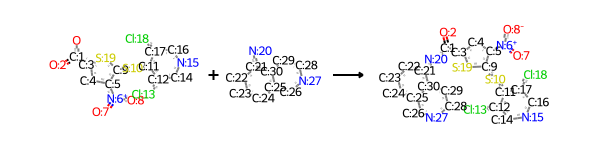

In [3]:
rxn = AllChem.ReactionFromSmarts(df.loc[1, 'rxn_smiles'])
rxn

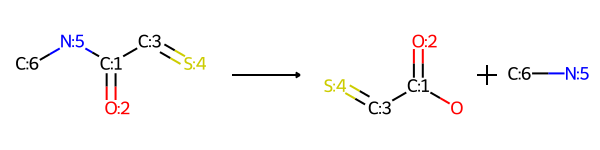

In [4]:
rxn = AllChem.ReactionFromSmarts(df.loc[1, 'retro_template'])
rxn

In [5]:
from falsify_data import *

['O-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3]:[#16;a:4]', '[NH2;D1;+0:5]-[c:6]']


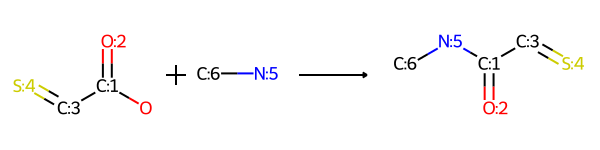

In [6]:
rxn = AllChem.ReactionFromSmarts(reverse_temp(df.loc[1, 'retro_template']))
rxn

In [7]:
df.loc[1, 'retro_template'].split('>>')[1]

'(O-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3]:[#16;a:4]).([NH2;D1;+0:5]-[c:6])'

In [8]:
reverse_temp(df.loc[1, 'retro_template']).split('>>')[0]

['O-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3]:[#16;a:4]', '[NH2;D1;+0:5]-[c:6]']


'(O-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3]:[#16;a:4]).([NH2;D1;+0:5]-[c:6])'